#### test_get_tide - Check to see if FES2014 global tidal model installation works  

from https://github.com/kvos/CoastSat.slope

Uses tidal model https://www.aviso.altimetry.fr/es/data/products/auxiliary-products/global-tide-fes/description-fes2014.html

Installation is a little tricky...you need a login from Aviso and the installation documentation is outdated.

In [1]:
# Option 1. if FES2014 global tide model is setup
import pyfes
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz

# beach slope estmation module
from coastsat import SDS_slope

In [2]:
# slope estimation settings
days_in_year = 365.2425
seconds_in_day = 24*3600
settings_slope = {'slope_min':        0.01,                  # minimum slope to trial
                  'slope_max':        0.2,                    # maximum slope to trial
                  'delta_slope':      0.005,                  # slope increment
                  'date_range':       [2018,2021],            # range of dates over which to perform the analysis
                  'n_days':           8,                      # sampling period [days]
                  'n0':               50,                     # parameter for Nyquist criterium in Lomb-Scargle transforms
                  'freqs_cutoff':     1./(seconds_in_day*30), # 1 month frequency
                  'delta_f':          100*1e-10,              # deltaf for identifying peak tidal frequency band
                  'prc_conf':         0.05,                   # percentage above minimum to define confidence bands in energy curve
                  }
settings_slope['date_range'] = [pytz.utc.localize(datetime(settings_slope['date_range'][0],5,1)),
                                pytz.utc.localize(datetime(settings_slope['date_range'][1],1,1))]
beach_slopes = SDS_slope.range_slopes(settings_slope['slope_min'], settings_slope['slope_max'], settings_slope['delta_slope'])

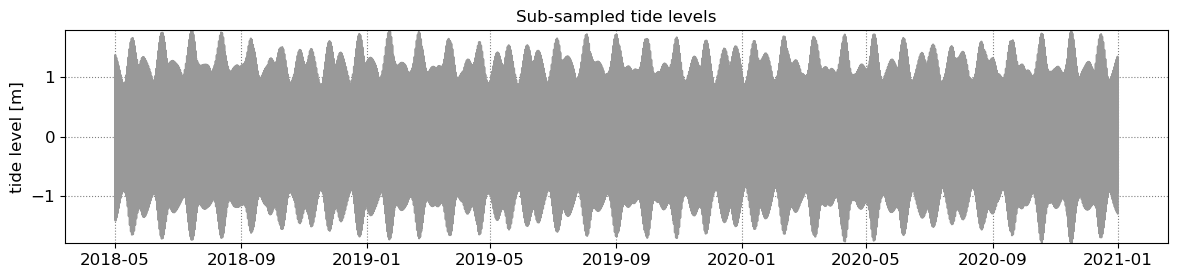

In [3]:
# point to the folder where you downloaded the .nc files
filepath = r'C:\crs\src\fes-2.9.1-Source\data'
config_ocean = os.path.join(filepath, 'ocean_tide.ini') # change to ocean_tide.ini
config_load =  os.path.join(filepath, 'load_tide.ini')  # change to load_tide.ini
ocean_tide = pyfes.Handler("ocean", "io", config_ocean)
load_tide = pyfes.Handler("radial", "io", config_load)

# coordinates of the location (always select a point 1-2km offshore from the beach)
# if the model returns NaNs, change the location of your point further offshore.
# Coords offshore of Head of the Meadow
coords = [-70.0643, 42.0643]
# get tide time-series with 15 minutes intervals (only for plotting purposes)
time_step = 15*60
dates_fes, tide_fes = SDS_slope.compute_tide(coords,settings_slope['date_range'],time_step,ocean_tide,load_tide)
# get tide level at time of image acquisition
#tide_sat = SDS_slope.compute_tide_dates(coords, dates_sat, ocean_tide, load_tide)

# plot tide time-series
fig, ax = plt.subplots(1,1,figsize=(12,3), tight_layout=True)
ax.set_title('Sub-sampled tide levels')
ax.grid(which='major', linestyle=':', color='0.5')
ax.plot(dates_fes, tide_fes, '-', color='0.6')
#ax.plot(dates_sat, tide_sat, '-o', color='k', ms=4, mfc='w',lw=1)
ax.set_ylabel('tide level [m]')
ax.set_ylim(SDS_slope.get_min_max(tide_fes));